# Introduction to Data Science and Systems 2019-2020<small><small>v20192020b</small></small>
## Lab 1 (part II): Vectors and matrices [assessed]
#### - ***you should submit this notebook to Moodle (see the end of the notebook and Moodle for instructions)***

#### University of Glasgow, BSJ & JHW, 2019

## Purpose of this lab
This lab builds on the ***worked*** example in Part I that will have prepared you to address the questions Part II.

The Lab should help you to:
* understand how data can be represented as points in vector space
* understand the effect of different vector norms
* apply the inner product to compute the angle between vectors
* apply linear maps to data/vectors (in particular maps that reduce dimensionality) and visualise the result
* analysing and interpreting projections and distances [new to part II]

## Guide

Lab 1 is structured as follows (with four main task sections):

> Part I - worked example [***no need to submit***]:
>-    **Task A: Dataset** [in the worked example; part I]
>-    **Task B: Analysis** [in the worked example; part I]
>-    **Task C: Applying linear maps to a dataset (for visualisation)** [in the worked example; part I]
>-    **Appendix: Marking Summary (and additional metadata)**
>
> Part II [***you should submit this part***]
> -    **Task D: Analysing regional flavours** [in this notebook]
> -    **Appendix: Marking Summary (and additional metadata)**
    
We recommend you read through the lab *carefully* and work through the tasks.

#### Material and resources 
- It is recommended to keep the lecture notes (from lecture 1 and lecture 2) open while doing this lab exercise. 
    * ... and you should, of course, be prepared to access some of the recommended material.
- If you are stuck, the following resources are very helpful:
 * [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
 * [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
 * [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

#### Marking and Feedback
This assessed lab is marked using three different techniques;

- Autograded with feedback; you'll get immediate feedback.
- Autograded without (immediate) feedback (there will always be a small demo/test so you can be confident that the format of your answer is correct).
- Manually graded (by an actual human). This type of question generates a pdf file that must be uploaded to Moodle alongside the notebook. We do not provide individual feedback, but a model solution will be provided so you can see what was expected.

*Note*: auto-graded results are always provisional and subject to change in case there are significant issues (this will usually be in favor of the student).

#### Help \& Assistance
- This lab is graded and the lab assistants/lecturer can provide guidance but we can (and will) not give you the final answer or confirm your result [at least in normal circumstances...].

#### Plagiarism
- All submissions will be automatically compared against each other so make sure your submission represents an independent piece of work! We have provided a few checks to make sure that is indeed the case.


---

Let's import some useful Python packages and define a few custom functions...

In [1]:
# Standard imports
# Make sure you run this cell!
# NumPy
import numpy as np  
import binascii
import os
import sys
from uuid import getnode as get_mac

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

# custom utils (you do not need to understand this!) 
from jhwutils.checkarr import array_hash, check_hash
import jhwutils.image_audio as ia
import jhwutils.tick as tick

tick.reset_marks()
tick_hidden = 0
tick_hidden_pass = 0
tick_visible = 0
tick_manual = 0

def case_crc(s, verbose=True):
    h_crc =  binascii.crc32(bytes(s.lower(), 'ascii'))
    if verbose:
        print(h_crc)
    return h_crc

# this command generaties a unique key for your system/computer/account
uuid_simple = (("%s") % get_mac())
uuid_str = ("%s\n%s\n%s\n%s\n%s\n") % (os.path,sys.path,sys.version,sys.version_info,get_mac())
uuid_system = case_crc(uuid_str,verbose=False) 

# ignore any warnings below, they don't affect the results
print("Everything imported OK")

Everything imported OK


/usr/local/lib/python3.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


---

**Mini-task**: provide your personal details in two variables:

* `student_id` : a string containing your student id (e.g. "1234567x"), must be 8 chars long.
* `student_typewritten_signature`: a string with your name (e.g. "Adam Smith") which serves as a declaration that this is your own work (read the declaration of originality when you submit on Moodle).

In [2]:
student_id = "2473686L" # your 8 char student id
student_typewritten_signature = "Molin Liu" # your full name, avoid spceical chars if possible

In [3]:
## We will print your info to a pdf file at the end of the notebook - 
# including the Declaration of Originality - which must be uploaded alongside 
# the actual notebook  you should also see two green "v [0 marks] 
# indicating that your info meet the basic std)

with tick.marks(0): # you don't get any credit for remembering your student id. This is just a test!
    assert(len(student_id)==8)

with tick.marks(0):  # you don't get any credit for remembering your own name! This is just a test!
    assert(len(student_typewritten_signature)>0)

---

## Revisiting the Whisky dataset from Lab 1 (part I)

The dataset in `data/whisky.csv` is data from a number of whisky distilleries. For each distillery, there is a set of subjective judgements about the flavour characteristics of their product. The data comes from [this Strathclyde University research project](https://www.mathstat.strath.ac.uk/outreach/nessie/nessie_whisky.html).

Each distillery has been judged on twelve flavour indicators (like "smokiness" or "sweetness"), and they have been assigned values from 0-4, indicating the strength of that category as judged by an expert whisky drinker. These can be seen as 12D vectors, one vector per distillery. **Every distillery is represented as a point in twelve dimensional vector space.**

We also have a 2D array of the geographical locations of each distillery. The code below loads the data.

## Loading the data

In [4]:
## It is not necessary to understand this code to complete
# the exercise....
import pandas as pd

whisky_df = pd.read_csv("data/whiskies.txt")
whisky_df = whisky_df.sort_values(by="Distillery")
# extract the column and row names
distilleries = np.array(whisky_df["Distillery"])

columns = {name.lower(): index for index, name in enumerate(whisky_df.columns[2:-3])}

# split apart the data frame and form numpy arrays
locations = np.array(whisky_df.iloc[:, -2:])
whisky = np.array(whisky_df.iloc[:, 2:-3])

# fix wine column which is misnamed
columns["wine"] = columns["winey"]
del columns["winey"]
# force tie breaks
np.random.seed(2018)
whisky = whisky + np.random.normal(0, 0.1, whisky.shape)

---

## Viewing the data

We can see this whole dataset as a heatmap:

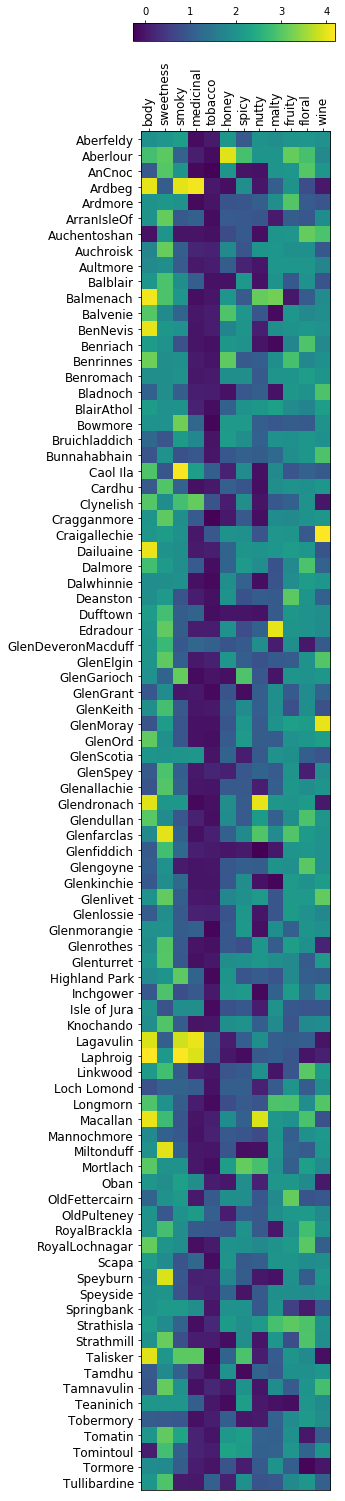

In [5]:
# show a plot of the whisky data
fig = plt.figure(figsize=(10,25))
ax = fig.add_subplot(1,1,1)

# image plot
img = ax.imshow(whisky)
ax.set_yticks(np.arange(len(distilleries)))
ax.set_yticklabels(distilleries, rotation="horizontal", fontsize=12)

# put the x axis at the top
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)

# some horrific colorbar hackery to put in the right place
# don't worry about this bit!
cbaxes = fig.add_axes([0.37, 0.93, 0.28, 0.01])  
fig.colorbar(img, orientation='horizontal',  cax=cbaxes, ticks=np.arange(5))
cbaxes.xaxis.tick_top()

---

## Demeaning
The dataset that we have is unnormalised. It is a set of ratings, 0-4, and many of the attributes rated are very correlated (e.g. `smoky` and `medicinal`). Many of the ratings are also on quite different scales, with `tobacco` being much less likely to be rated 4 than `floral`.

It is easier to work with normalised data, and we there for compute:
* `mean_vector` the average flavour profile (you should have this from part A already)
* `demeaned_whisky` that has the mean flavour vector removed. 



In [6]:
mean_vector = np.mean(whisky, axis=0)
demeaned_whisky = whisky - mean_vector

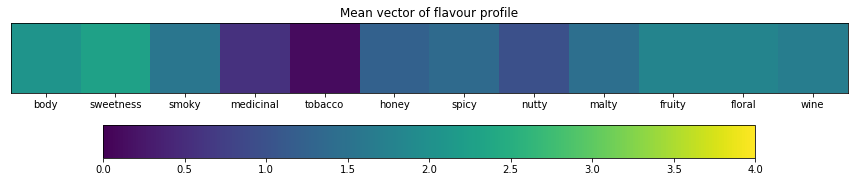

In [7]:
## We show the mean vector as an image strip
## Remember: this represents a point in space (a 12 dim vector) !
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(mean_vector[None,:], cmap='viridis', vmin=0, vmax=4)
ax.set_xticklabels(columns)
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks([])
ax.set_title("Mean vector of flavour profile")
fig.colorbar(img, orientation='horizontal')

We can also compute the **covariance matrix** of the *demeaned* data in `whisky_cov`. 
The covariance matrix tells us how different columns of the dataset are correlated (co-vary) with each other.

In [8]:
whisky_cov = np.cov(demeaned_whisky, rowvar=False) # rowvar=False means that the variables are columns, not rows

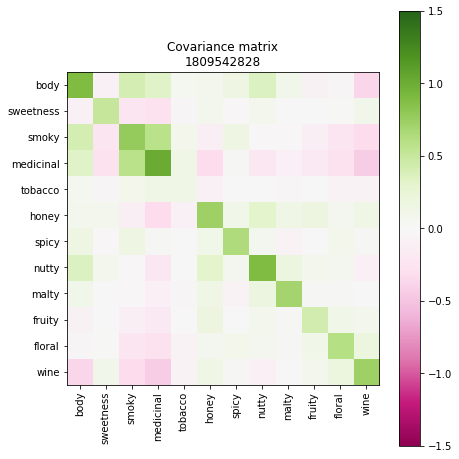

In [9]:
fig = plt.figure(figsize=(6, 6)) # Do not change the name of fig (this will be a two mark reduction!)
ax = fig.add_subplot(1,1,1)
img = ax.imshow(whisky_cov, cmap='PiYG', vmin=-1.5, vmax=1.5)
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_yticklabels(columns)
ax.set_xticklabels(columns, rotation='vertical')
ax.set_title(("Covariance matrix\n%s") % (uuid_system))
fig.colorbar(img)
# resize the figure to match the aspect ratio of the Axes    
fig.set_size_inches(7, 8, forward=True)


---

### Task D: Analysis and interpretation of projected data [assessed]


Recall that the Whisky ratings lives in a 12 dimensional vectors space which is difficult to understand for most humans. One very useful technique is to project data onto a lower dimensinal subspace, e.g. 2D, to visualise the data. This forms a simplified version of the data. We can map the data onto abritary vectors which migth be useful to our visual axes. In a simple example we migth choose to map the 12 dimensions onto the first two dimensions (e.g. removing the remaning 10 dimension without much consideration). This is perfectly valid and often the first step in any analysis.

This ability to map high dimensional vectors onto low dimensional (vector) spaces is a key technique in exploratory data analysis. 

We can compute a projection of a dataset onto an arbitrary set of vectors by forming a matrix product:
$$P = XV,$$

where $P$ is an $N\times k$ matrix that is the result of the projection, $X$ is the $N \times D$ original data set and $V$ is an $D \times k$ matrix, each of whose *columns* is a vector that we want to project onto.


In part I of Lab 1, we projected `demeaned_whisky` onto the follwing vectors of (proclaimed) interest (note we have renamed them to $\mathbf{v^{(a)}}$ and $\mathbf{v^{(b)}}$ for convenience):

$$\mathbf{v^{(a)}} = [0.36, -0.48,  0.07, -0.06,  0.296, -0.09, -0.04,  0.5,  0.15, -0.24,  0.42, -0.016]^\top$$

$$\mathbf{v^{(b)}} = [-0.19, -0.04, -0.13, -0.43, -0.03, -0.5, -0.41,  0.14,  0.42,  0.30, -0.22, -0.013]^\top$$

such that $V = [\mathbf{v^{(a)}},\mathbf{v^{(a)}}]$. We did this using the following `numpy` commands:

In [10]:
# define the arbitray vectors
va = np.array([0.36, -0.48,  0.07, -0.06,  0.296, -0.09, -0.04,  0.5,  0.15, -0.24,  0.42, -0.016]).T
vb = np.array([-0.19, -0.04, -0.13, -0.43, -0.03, -0.5, -0.41,  0.14,  0.42,  0.30, -0.22, -0.013]).T

# concat into a 12x2 matrix (note we could have done this the other way around if. 
# we wanted to, but we still want to call the output p1 and p2; hence we call the vectors a and b)
V = np.vstack((va,vb))

# performan the projection using matrix multiplcation of the date onto v.
P = demeaned_whisky @ V.T

# or p = (V @ demeaned_whisky.T).T # (you should make sure you understand this trick)


And we can visualize the result in a 2D plot where vectors $\mathbf{v^{(a)}}$ and $\mathbf{v^{(b)}}$ now represent the axes, and the $p_1$ and $p_2$ are the coordinates along those axes.

(86, 2)
(2, 12)


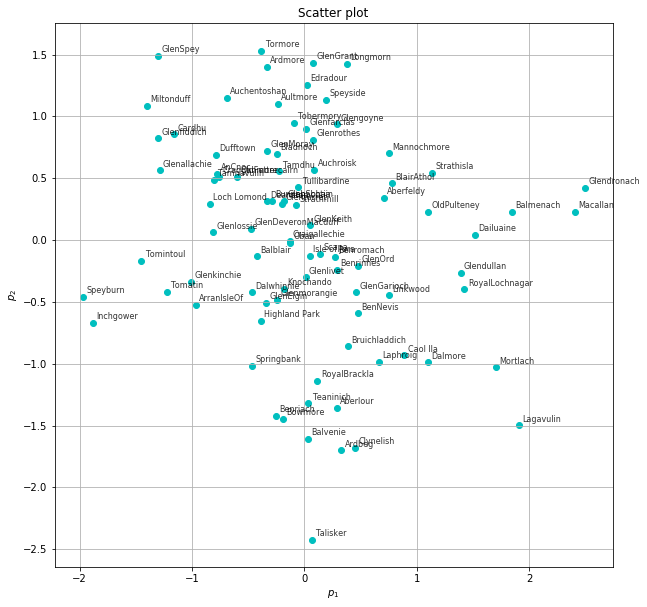

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

print(P.shape)
print(V.shape)
for d in distilleries:
    p_distil = P[distilleries==d,:]
    ax.scatter(p_distil[:,0],p_distil[:,1],color='c')
    ax.set_title(("%s") % ("Scatter plot"))
    ax.text(p_distil[:,0]+0.03,p_distil[:,1]+0.03, d, fontdict={"size":8}, alpha=0.8)        
    plt.ylabel("$p_2$")
    plt.xlabel("$p_1$")
ax.grid()

By projecting (via matrix/vector multiply), we have managed to map the high dimensional data onto a 2D space that is much easier for our human brain to understand; we can now understand the distances between distilleries. One caveat is that we have thrown information away (we will look into this problem in lab 2). Regardless, we now have a 2D map of the Scottish distilleries based on the flavors - not their geographical location.

We also noted how certain aspects of the flavour have a more significant role than others in defining the projections by looking at the specific coordinates of $\mathbf{v^{(a)}}$ and $\mathbf{v^{(a)}}$.

Text(0, 0.5, 'value \n')

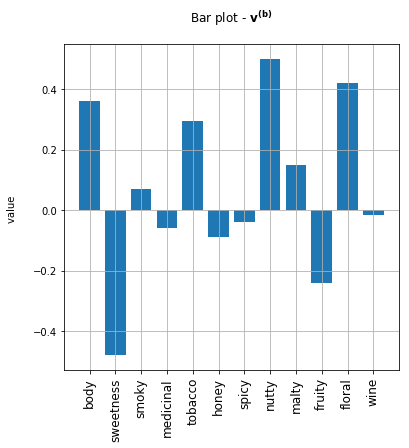

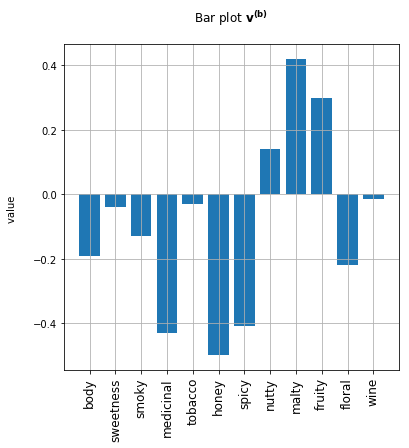

In [12]:
# plot the values as an informative bar plor
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(12),V[0,:])
ax.grid()
ax.xaxis.tick_bottom()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)
ax.set_title(("%s\n") % ("Bar plot - $\mathbf{v^{(b)}}$"))
plt.ylabel('value \n')


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(12),V[1,:])
ax.grid()
ax.xaxis.tick_bottom()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)
ax.set_title(("%s\n") % ("Bar plot $\mathbf{v^{(b)}}$"))
plt.ylabel('value \n')

We see that;
- `nutty` and `floral` are important in defining $\mathbf{v^{(a)}}$
- `sweethness` is important for $\mathbf{v^{(a)}}$, but in a "negative" manner
- `honey` is important for $\mathbf{v^{(b)}}$ also in a "negative" manner
- ... and so on. You should notice that the factors defining $\mathbf{v^{(a)}}$ and $\mathbf{v^{(b)}}$ are quite different

We will explore this further in this lab to  understand how projecting data can help in visualising and especially understanding the data.


---

**Task D.1**

The projection $P=XV$ results in a linear combination of the input features in $X$ (here the `demeaned_whisky` data). We will try to make this very explicit by deliberately avoiding vector/matrix operations to understand what it actually means to "project" a vector $\mathbf{x}$ onto V.

For example the projection of Glenliviet's demeaned flavor vector, $\mathbf{x}$,  onto $\mathbf{v^{(a)}}$ (the first collum vector of V) can be written as:

$$p_{1} = \sum_k \mathbf{x}_k V_{k,1}= \sum_k \mathbf{x}_k {\mathbf{v}_k^{(a)}}$$

where k sums over the dimension of the dataset (here 12). Similarily for $\mathbf{v^{(b)}}$. $p_1$ and $p_2$ together forms a row in the $P$ matrix, e.g. $\mathbf{p}=[p_1,p_2]$.

For the distillery called "Glenlivet", implement code to compute 

- `p1s_glenlivet`: a 12x1 vector storing the indivdual elements in the sum (e.g. `x[3]*va[3]`) for projecting onto $\mathbf{v^{(a)}}$.
- `p1_glenlivet`: compute the sum over the individual elements in `p1s_glenlivet`

- `p2s_glenlivet`: a 12x1 vector storing the indivdual elements (e.g. `x[3]*vb[3]`) for projecting onto $\mathbf{v^{(b)}}$.
- `p2_glenlivet`: the sum of the elements in `p2s_glenlivet`


In [13]:
# YOUR CODE HERE
glenlivet = (demeaned_whisky[whisky_df[whisky_df.Distillery=='Glenlivet'].index]).T

p1s_glenlivet = glenlivet * np.vstack(va)
p2s_glenlivet = glenlivet * np.vstack(vb)

p1_glenlivet = np.sum(p1s_glenlivet)

p2_glenlivet = np.sum(p1s_glenlivet)#This should be p2s_glenlivet as follow:
#p2_glenlivet = np.sum(p2s_glenlivet)
print(p1_glenlivet)
print(p2_glenlivet)

0.010570545560449295
0.010570545560449295


In [14]:
## Visible, autograded assesment  [2 marks]

with tick.marks(2):        
    assert(check_hash(p1s_glenlivet, ((12,1), 3.31774833045614)))

In [15]:
## Visible, autograded assesment  [2 marks]
with tick.marks(2):        
    assert(check_hash(p1_glenlivet, ((), 0.05285272780224648)))

In [16]:
## Visible, autograded assesment [1 marks]
with tick.marks(1):        
    assert(check_hash(p2s_glenlivet, ((12, 1), -2.9986806202626672)))

In [17]:
## Visible, autograded assesment [1 marks]
with tick.marks(1):        
    assert(check_hash(p2_glenlivet, ((), 0.05285272780224648)))

The exercise above reminds us that each of "new" dimension in $P$ is simply an effect of a linear combination of the entries in the data weighted by the elements in $\mathbf{v^{(a)}}$  or $\mathbf{v^{(b)}}$  .

We have computed $p_1$ by a linear combination of a rowvector $\mathbf{x}$ from the `demeand_whisky` and a collum in $V$, e.g. the first collum (i.e. $\mathbf{v^{(a)}}$);
$$p_1 = \mathbf{x}_{1}\cdot V_{1,1} + \mathbf{x}_{2}\cdot V_{2,1} + \mathbf{x}_{3,1}\cdot V_{3,1} + ... + \mathbf{x}_{12}\cdot V_{12,1}$$

From the previos analysis of $\mathbf{v^{(a)}}$ and $\mathbf{v^{(b)}}$, we can see that for a distillery/whisky to get a high $p_1$ coordinate (say > 2, or even 10) a whisky needs to have a lot of "body" and/or low "sweetness" (i.e negative in the demeaned data) and/or be very "nutty". To get a large negative $p_1$ value we flip the argument, i.e., low "body" (i.e. negative) and/or high "sweetness" (i.e positive) and/or not be "nutty" (i.e. negative value).

We can reason about the different quadrants in the 2D coordinate system by looking at the $\mathbf{v^{(a)}}$ and $\mathbf{v^{(b)}}$ projection vectors considering the aspects they represent. Does this interpretation sound complicated? Well, it is, and one of the reasons is that the projection vectors have negative entries; we need to worry about what a Whisky is but also what it is not.

Let's think about a prototypical example at the extreme in each quardrant look like based on the most dominat aspects of the $\mathbf{v^{(a)}}$ and $\mathbf{v^{(b)}}$:

- First quardrant, e.g. $\mathbf{p}= [+3,+3]$: 
> &uarr;*body*, *sweetness*&darr;, &uarr;*nutty* and &uarr;*floral* 
>
> &darr;*medicial*, &darr;*honey*, &darr;*spicy*, &uarr;*malty* and &uarr;*fruty*

- Second quardrant , e.g. $\mathbf{p}=[-3,+3]$: 
> &darr;*body*, &uarr;*sweetness*, &darr;*nutty* and &darr;*floral* 
>
> &darr;*medicial*, &darr;*honey*, &darr;*spicy*, &uarr;*malty* and &uarr;*fruty*

- Third quardrant, e.g $\mathbf{p}= [-3,-3]$: 
> &darr;*body*, &uarr;*sweetness*, &darr;*nutty* and &darr;*floral* 
>
> &uarr;*medicial*, &uarr;*honey*, &uarr;*spicy*, &darr;*malty* and &darr;*fruty*


- Forth quardrant, e.g. $\mathbf{p}= [+3,-3]$: 
> &uarr;*body*, *sweetness*&darr;, &uarr;*nutty* and &uarr;*floral* 
>
> &uarr;*medicial*, &uarr;*honey*, &uarr;*spicy*, &darr;*malty* and &darr;*fruty*


It is hopefully obvios that is can be difficult to reason based on the absolute properties of data points in the projected 2D space. We can instead consider the distance between them in the 2D or the 12D space. We would hope that distilleries with whiskies that have similar flavor will also be projected close to each other (i.e., grouped or clustered together; recall the K nearest neighbor example from the topic1  lecture).

---

### Regional Flavours

The Scotish Whisky regions are typically promoted on having unique flavours (i.e. they effectively define their flavour based on the geographical location). Let's see if this is actually the case based on our 2D flavour map.

We have already had a looked at **island** region. This is a region bounded roughly by the box

    95000, 625000 -> 183000, 860000
    
    263000, 785000 -> 343000, 860000

    198000, 535000 -> 383000, 730000  

**Highlands & others**.
    The ones not in Island, Speyside or lowlands

The coordinates in the same OS grid units used in the `locations` array.

The areas are illustrated below.

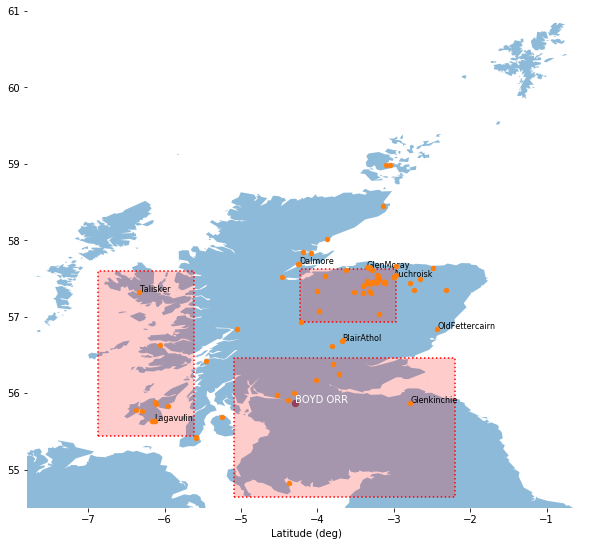

In [18]:
from whisky_map import draw_map, map_box

# draw each distillery label at the locations given.
ax = draw_map(locations, distilleries)

# show the island region
map_box(ax, 95000,  625000, 183000, 860000)

# show the speyside region  
map_box(ax, 263000, 785000, 343000, 860000 )

# show the lowland region 
map_box(ax, 198000, 535000, 383000, 730000)


**Task D.2 [autograded; partial feedback]** 


Determine the distilleries in each region by computing:
    
- `is_island`: 86 dimensional Boolean array indicating if the distillery belongs to the island region.
- `is_speyside`:86 dimmensional Boolean array indicating if the distillery belongs to the Speyside region.
- `is_lowland`: 86 dimmensional Boolean array indicating if the distillery belongs to the Lowland region.
- `is_highlandothers`:86 dimmensional Boolean array indicating if the distillery belongs to the Highland & others region.


In [19]:
# YOUR CODE HERE
is_island = (locations[:, 0] >= 95000) & (locations[:, 0] <= 183000) & (locations[:, 1] >= 625000) & (locations[:, 1] <= 860000)
is_speyside = (locations[:, 0] >= 263000) & (locations[:, 0] <= 343000) & (locations[:, 1] >=785000) & (locations[:, 1] <=860000)
is_lowland = (locations[:, 0] >= 198000) & (locations[:, 0] <= 383000) & (locations[:, 1] >=535000) & (locations[:, 1] <=730000)
is_highlandothers = (is_island[:] == False) & (is_speyside[:] == False) & (is_lowland[:] == False)
print(is_highlandothers)


[ True False  True False  True  True False False False  True False False
  True False False False False  True False False False False False  True
 False False False  True False False False  True  True  True  True False
 False  True  True  True False False  True False False False False False
 False  True  True False False  True  True False False False False  True
 False  True False  True  True False  True  True  True False False  True
 False False  True False False False False False  True False False False
 False False]


In [20]:
## we will put your answer in a data structure for later use - you must run his cell
regions = ('island','lowland','speyside','highlandandothers')
region_indexs = {0: is_island, 1: is_lowland, 2: is_speyside,3: is_highlandothers}

In [21]:
## Visible, autograded assesment [1 marks]

with tick.marks(1):        
    assert(check_hash(is_island, ((86,), 420.4368383430719)))


In [22]:
## Visible, autograded assesment [2 marks]

with tick.marks(2):        
    assert(check_hash(is_speyside, ((86,), 1679.9253411361872)))

In [23]:
## Visible, autograded assesment[2 marks]

with tick.marks(2):        
    assert(check_hash(is_lowland, ((86,), 350.3834882789953)))

In [24]:
## Visible, autograded assesment [3 marks]

with tick.marks(3):        
    assert(check_hash(is_highlandothers, ((86,), 1296.8406005307456))) 

---

**Task D.3 [12 marks, manually graded]**

The aim in this task is to create a figure that allows us to analyse the 2D flavour map in terms of regions. Doing so will allow us to analyse e.g., if all the *lowland* whiskeys are grouped in a specific area of the map perhaps *island* whiskeys in another.

The plot should illustrate the result of projecting `demeaned_whisky` onto $V$ as a 2D scatter plot (i.e. plotting the resulting vectors/data points after the projection). Hint: this is an extended version of a figure we have already produced. The figure must also (clearly) indicate the mean vector (using an L2 norm) representing the average flavour profile for each region (this will be useful below).

The figure should follow best practices in [data visualisation](https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1003833&type=printable) and must;
- present a 2D scatter plot with 86 unique date points representing the distilleries [2 marks].
    - the data points should have <span class="mark">region-specific markers</span> and color combinations. The colors and markers should be chosen so they allow easy identification of the region to which the distillery belong. [3 marks].
    - include <span class="mark">informative labels</span> on the projected data point/vectors (e.g.using `ax.text`); Hint: there are 86 relevant labels. [1 marks].  
- contain four correctly computed mean values (as data points), i.e., you'll need to compute <span class="mark">the mean for the distilleries in each of the four regions</span>) [4 marks]. 
- include a suitable legend [1 marks].
- have informative labels on the x-axis, y-axis, and suitable scaling of each axis.[0.5 marks]
- include a suitable title [0.5 marks].

The figure title must additionally **include your `student_id` and the value of the `uuid_system`** variable defined at the very beginning of this notebook (see Part I if you're in doubt about this). A two band penalty will be applied if you fai lto meet this requirement.

*Hint*: Please consult the recommended resources on Moodle if your are in doubt about how to make suitable visualisations of data (start with [Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1003833&type=printable)]

*Note*: It is okay if a few/some of the distillery labels overlap as long a the majory are clearly visible.

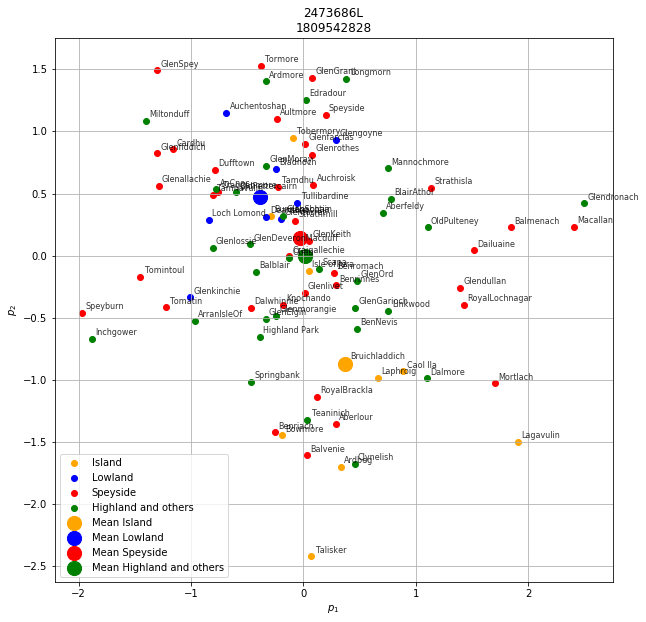

In [25]:
fig_d3 = plt.figure(figsize=(10,10)) # do not change the name of fig_d3 !!!
ax = fig_d3.add_subplot(1,1,1)

region_id = np.full(is_island.shape, 3)
region_id[is_island] = 0
region_id[is_lowland] = 1
region_id[is_speyside] = 2

region_label = np.full(is_island.shape, 'Highland and others')
region_label[is_island] = 'Island'
region_label[is_lowland] = 'Lowland'
region_label[is_speyside] = 'Speyside'

labels = ["Island", "Lowland", "Speyside", "Highland and others",
         "Mean Island", "Mean Lowland", "Mean Speyside", "Mean Highland and others"]

mean_matrix = np.zeros((4,2))
mean_matrix[0]= np.mean(P[is_island], axis=0)
mean_matrix[1]= np.mean(P[is_lowland], axis=0)
mean_matrix[2]= np.mean(P[is_speyside], axis=0)
mean_matrix[3]= np.mean(P[is_highlandothers], axis=0)
mean_matrix = np.column_stack((np.arange(4), mean_matrix))
ax.set_title(("%s\n%d"%(student_id, uuid_system)))

#sc= ax.scatter(P[:, 0], P[:, 1], c=region_id)
sc1 = ax.scatter(P[is_island, 0], P[is_island, 1], marker='o', c='orange')
sc2 = ax.scatter(P[is_lowland, 0], P[is_lowland, 1], marker='o', c='blue')
sc3 = ax.scatter(P[is_speyside, 0], P[is_speyside, 1], marker='o', c='red')
sc4 = ax.scatter(P[is_highlandothers, 0], P[is_highlandothers, 1], marker='o', c='green')

#scatter2 = ax.scatter(mean_matrix[:,1], mean_matrix[:,2], marker='o', s=450, c=mean_matrix[:,0])

mean_sc1 = ax.scatter(mean_matrix[0, 1], mean_matrix[0, 2], marker='o', s=200, c='orange')
mean_sc2 = ax.scatter(mean_matrix[1, 1], mean_matrix[1, 2], marker='o', s=200, c='blue')
mean_sc3 = ax.scatter(mean_matrix[2, 1], mean_matrix[2, 2], marker='o', s=200, c='red')
mean_sc4 = ax.scatter(mean_matrix[3, 1], mean_matrix[3, 2], marker='o', s=200, c='green')

plt.legend((sc1, sc2, sc3, sc4, mean_sc1, mean_sc2, mean_sc3, mean_sc4), labels, loc='lower left')

for d in distilleries:
    local_p = P[distilleries==d,:]
    ax.text(local_p[:,0]+0.03, local_p[:,1]+0.03, d, fontdict={"size":8}, alpha=0.8)
plt.ylabel("$p_2$")
plt.xlabel("$p_1$")


ax.grid()



In [26]:
## Hidden, manually graded test [12 marks] 
# this is a manually graded question without feedback; a model-answer will be provided.

# Just in case you did not provide the two variables we still want to plot a blank figure for the final report
try:
    fig_d3 == None
except:
    print("Warning: you have not produced a corrrect output for fig_d3 yet")
    fig_d3 = plt.figure(figsize=(10,10)) # do not change the name of fig_d3 !!!  



---


**Task D.5 [autograded; partial feedback]** 

You have (hopefully) produced a useful scatter plot that illustrates the regions in a 2D map. To see if the regions are well separated in either the original 12D flavor space or in your new 2D space, we will compute the distance between all the four regions in both vector spaces.

You must now compute the distance between a region (with multiple distilleries) and another region (also containing multiple distilleries). There are several ways to compute such a distance. A simple approach is to first compute a mean vector for each region and then compute the pairwise distances between all regions based on those regional mean vectors.

Compute the distance between the four regions using the L2 norm using the procedure outlined above as save them as:
- `region_l2distance_2d`: a 4x4 matrix with the distance between the four regions computed in the 2d space (`P`).
- `region_l2distance_12d`: a 4x4 matrix with the distance the distance between the four regions computed in the original 12d space (`demeaned_whisky`)



In [27]:
# You need to compute the correct values for the two distance matrices
region_l2distance_2d = np.zeros((4,4)) # note you have probbaly already computed this before in this notebook....
region_l2distance_12d = np.zeros((4,4))

mean_matrix2 = np.zeros((4, 12))

mean_matrix2[0] = np.mean(demeaned_whisky[is_island], axis=0)
mean_matrix2[1] = np.mean(demeaned_whisky[is_lowland], axis=0)
mean_matrix2[2] = np.mean(demeaned_whisky[is_speyside], axis=0)
mean_matrix2[3] = np.mean(demeaned_whisky[is_highlandothers], axis=0)

mean_matrix1 = mean_matrix[:, 1:]
print(mean_matrix1)
for i in range(4):
    for j in range(4):
        region_l2distance_2d[i][j] = np.linalg.norm(mean_matrix1[j]-mean_matrix1[i])
        region_l2distance_12d[i][j] = np.linalg.norm(mean_matrix2[j]-mean_matrix2[i])


[[ 0.37242491 -0.87015984]
 [-0.38315721  0.47140872]
 [-0.02867581  0.13887101]
 [ 0.01296818 -0.00670641]]


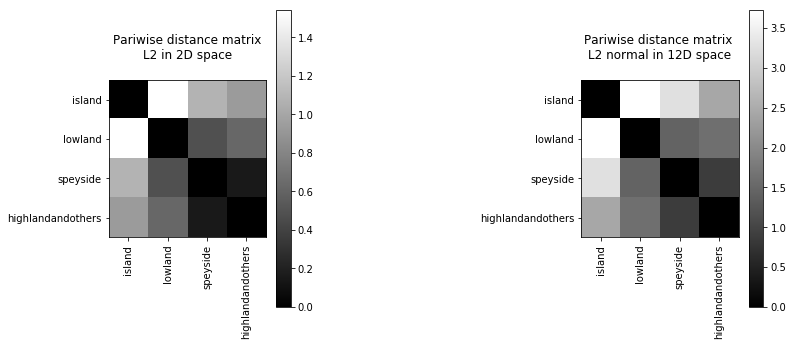

In [28]:
# You must run this cell (so you can generate the final pdf report)!

## Just in case you did not provide the two variables we still want to plot a zero matrix in the final report
try:
    region_l2distance_2d.shape    
except:
    region_l2distance_2d = np.zeros((4,4)) 
    print("Warning: you have not produced a corrrect output for region_l2distance_2d yet")
try:
    region_l2distance_12d.shape    
except:
    region_l2distance_12d = np.zeros((4,4)) 
    print("Warning: you have not produced a corrrect output for region_l2distance_12d yet")
    
## We can visualize the distance matrices you have just computed
fig_d5 = plt.figure(figsize=(12,12)) 
ax = fig_d5.add_subplot(2,3,1)
img = ax.imshow(region_l2distance_2d, cmap='gist_gray')
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_yticklabels(regions)
ax.set_xticklabels(regions, rotation='vertical')
ax.set_title(("Pariwise distance matrix\nL2 in 2D space\n") )
fig_d5.colorbar(img)

ax = fig_d5.add_subplot(2,3,3)
img = ax.imshow(region_l2distance_12d, cmap='gist_gray')
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_yticklabels(regions)
ax.set_xticklabels(regions, rotation='vertical')
ax.set_title(("Pariwise distance matrix \nL2 normal in 12D space\n") )
fig_d5.colorbar(img)


In [29]:
## Visible, autograded assesment [7 marks]: this is an automatic test with immediate feedback 
with tick.marks(7):        
    assert(check_hash(region_l2distance_2d, ((4, 4), 68.93438749712197))) 

In [30]:
## Visible, autograded assesment [7 marks]: this is an automatic test with immediate feedback 
with tick.marks(7):        
    assert(check_hash(region_l2distance_12d, ((4, 4), 199.47596556299965)))

**Task D.6 [autograded; partial feedback]**  
*Note* This is the challenging part of this Lab - it is not a trivial task and wil take some consideration.


The algorithm we suggested above computes the L2 norm between the region level mean vectors of the flavors profile. Such an approach does not capture the shape of the point cloud representing the distilleries in that region. We will, therefore, compute a somewhat different distance metric called the symmetric [Kullback-Leibler distance](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (formally a divergence) between any two point clouds (i.e., two different data matrices). It is defined as;

$${\hat d_{KL}}\left({\mathbf{X}_{i},\mathbf{X}_{j}} \right) = \frac{1}{2}\left( {\operatorname{tr} \left( {{\mathbf{\Sigma }}_j^{ - 1}{{\mathbf{\Sigma }}_i}} \right) + {{\left( {{{{\boldsymbol{\mu} }}_j} - {{{\boldsymbol{\mu} }}_i}} \right)}^{\text{T}}}{\mathbf{\Sigma }}_j^{ - 1}({{{\boldsymbol{\mu} }}_j} - {{{\boldsymbol{\mu} }}_i}) - d + \ln \frac{{|{{\boldsymbol{{\Sigma }}}_j}|}}{{|{{\mathbf{\Sigma }}_i}|}}} \right)$$


And the symmetric version we're interested in here:

$${d_{kl}}\left( {\mathbf{X}_{i},\mathbf{X}_{j}}\right) = \frac{1}{2} \left ({\hat d_{kl}}\left( {\mathbf{X}_{i},\mathbf{X}_{j}}\right)  + {\hat d_{kl}}\left( {\mathbf{X}_{j},\mathbf{X}_{i}}\right) \right).$$

Where (in general):
- $n_{region}$: the number of distilleries in a region (i.e. number of row vectors corresponding to a particular distillery)
- d is the dimension of the data vector $\mathbf{x}$, here d would be 2 or 12.
- $\mathbf{X}_i$: is a $n_{region} \times 2$ or $n_{region}\times 12$ dimensional matrix with the feature vectors for a particular region as rows (i.e. a subset of rows from the `demeaned_whisky` matrix).
- $\operatorname{tr}(Z)$: is the trace of a symmetric matrix $Z$.
- $|Z|$: is the (matrix) determinant of a symmetric matrix $Z$.
- $\boldsymbol{\mu}_i$: is the (dx1) mean vector of the feature vectors in the i'th region, i.e. mean of $X_i$.
- $\boldsymbol{\mu}_j$:is the (dx1) mean vector of the feature vectors in the j'th region, i.e., mean $X_j$.
- $\boldsymbol{\Sigma}_i$: is in the general case the (dxd) covarince matrix of the feature vectors in the i'th region, i.e. `np.linalg.cov(X_i)`.
- $\boldsymbol{\Sigma}_j$: is in the general case the (dxd) covarince matrix of the feature vectors in the j'th region, i.e. `np.linalg.cov(X_j)`.
- $\operatorname{ln}(q)$: is the natural logarithm of $q$, i.e., `np.log(q)`


Computing the KL distance involves a number of different matrix operations, namely multiplication, matrix inverse, determinants, and traces. Thus it allows you to review and practice your matrix operation skills in `numpy`.

There is a few **issues** in applying the general formulation to our case; computing the covariance with very few data points (as low as 10 for *island*) in a 12 dimensional vector space is a difficult and futile task. The resulting covariances matrices would often be ill-conditioned (you can check with `np.linalg.cond`) and would (often) lead to numerical instability. We will, therefore, make a special assumption, namely that the covariance matrices are diagonal, which implies that we only need to compute the variance across each dimension, not the covariance. The covariance matrices used to compute the distances (for the submission) must therefore be:

- $\boldsymbol{\Sigma}_i$: a dxd **diagonal** matrix where the diagonal is effectively a 2/12D vector with the variance (e.g. using `np.var`) (elements outside diagonal must be zero)
- $\boldsymbol{\Sigma}_j$: a dxd **diagonal** matrix where the diagonal is effectively a 2/12D vector with the variance (e.g. using `np.var`) (elements outside diagonal must be zero)

Your task is to compute all the pairwise region distances and store them as;
- `region_kldistance_2d`: a 4x4 matrix with the distances computed in the 2d space.
- `region_kldistance_12d`: a 4x4 matrix with all the distances computed in the original 12d space (`demeaned_whisky`)

*Hint*: you can assume that the diagonal covariance matrices are positive semidefinite and that it is safe to use `np.linalg.inv` for computeing the inverse of the covariance matrices.



In [31]:
# Note: this is a challeging task involving some thinking on your part, 
# and a bit of coding.You need to apply what you know about matrices 
# so far, so don't try to rush this.

# You'll need to compute...
region_kldistance_2d = np.zeros((4,4)) # note you have probbaly already computed this before in this notebook....
region_kldistance_12d = np.zeros((4,4))

def KL_2d(i, j):
    i_cov = np.zeros((P[region_indexs[i]].shape[1], P[region_indexs[i]].shape[1]))
    j_cov = np.zeros((P[region_indexs[j]].shape[1], P[region_indexs[j]].shape[1]))
    for k in range(P[region_indexs[i]].shape[1]):
        i_cov[k, k] = np.var(P[region_indexs[i]][:,k])
        j_cov[k, k] = np.var(P[region_indexs[j]][:,k])
    
    i_cov = np.matrix(i_cov)
    j_cov = np.matrix(j_cov)
#    print(i_cov)
#    print(np.cov(P[region_indexs[i]], rowvar=False))
    '''
    item1 = np.trace(
        np.linalg.inv(
            np.cov(P[region_indexs[j]],rowvar=False)
        )@np.cov(P[region_indexs[i]],rowvar=False)
    )
    item2 = (
        (mean_matrix1[j]-mean_matrix1[i]).T
    @(
        np.linalg.inv(
        np.cov(P[region_indexs[j]],rowvar=False)
        )
    )
        @(mean_matrix1[j]-mean_matrix1[i]))
    
    item4 = np.log(
        (
        np.linalg.det(
            np.cov(P[region_indexs[j]],rowvar=False))
        )
        /
        (
            np.linalg.det(
                np.cov(P[region_indexs[i]],rowvar=False)
            )
        )
    )
    '''
    item3 = 2
    item1 = np.trace(
        j_cov.I@i_cov
    )
    item2 = ((mean_matrix1[j]-mean_matrix1[i]).T
    @(
        j_cov.I
    )
        @(mean_matrix1[j]-mean_matrix1[i]))
    item4 = np.log(
        (
        np.linalg.det(
            j_cov
        )
        )/
        (
            np.linalg.det(
                i_cov
            )
        )
    )
    KL_2d = 0.5*(item1+item2-item3+item4)
    return KL_2d
def KL_12d(i, j):
    i_cov = np.zeros((demeaned_whisky[region_indexs[i]].shape[1], demeaned_whisky[region_indexs[i]].shape[1]))
    j_cov = np.zeros((demeaned_whisky[region_indexs[j]].shape[1], demeaned_whisky[region_indexs[j]].shape[1]))
    for k in range(demeaned_whisky[region_indexs[i]].shape[1]):
        i_cov[k, k] = np.var(demeaned_whisky[region_indexs[i]][:,k])
        j_cov[k, k] = np.var(demeaned_whisky[region_indexs[j]][:,k])
    
    i_cov = np.matrix(i_cov)
    j_cov = np.matrix(j_cov)
    item3 = 2
    item1 = np.trace(
        j_cov.I@i_cov
    )
    item2 = ((mean_matrix2[j]-mean_matrix2[i]).T
    @(
        j_cov.I
    )@(mean_matrix2[j]-mean_matrix2[i]))
    
    item4 = np.log(
        (
        np.linalg.det(
            j_cov
        )
        )/
        (
            np.linalg.det(
                i_cov
            )
        )
    )
    KL_12d = 0.5*(item1+item2-item3+item4)
    return KL_12d
for i in range(4):
    for j in range(4):
        kl_2d = 0.5*(KL_2d(i, j)+KL_2d(j, i))
        kl_12d = 0.5*(KL_12d(i, j)+KL_12d(j, i))
        region_kldistance_2d[i][j] = kl_2d
        region_kldistance_12d[i][j] = kl_12d
# YOUR CODE HERE


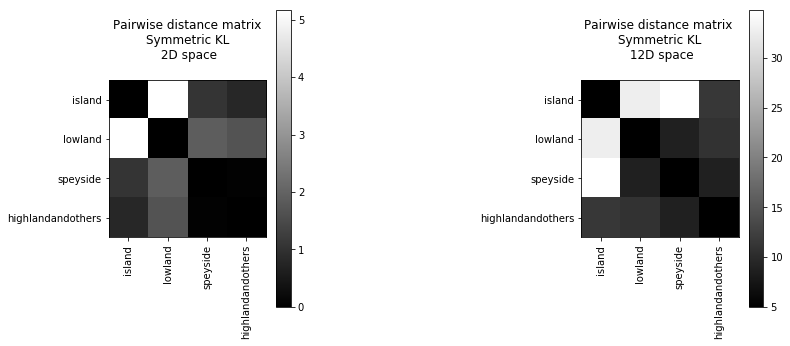

In [32]:
## You must run this cell to produce figures for the final pdf report

## Just in case you did not provide the two variables we still want to plot a blank figure for the final report
try:
    region_kldistance_2d.shape
except:
    region_kldistance_2d = np.zeros((4,4)) 
try:
    region_kldistance_12d.shape
except:
    region_kldistance_12d = np.zeros((4,4))     

# We can visualize the KL distance matrices you have just computed
fig_d6 = plt.figure(figsize=(12,12)) # do not change the name of fig_dTODO (we will add some text to the figure later on)
ax = fig_d6.add_subplot(2,3,1)
img = ax.imshow(region_kldistance_2d, cmap='gist_gray')
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_yticklabels(regions)
ax.set_xticklabels(regions, rotation='vertical')
ax.set_title(("Pairwise distance matrix\nSymmetric KL\n 2D space\n") )
fig_d6.colorbar(img)

ax = fig_d6.add_subplot(2,3,3)
img = ax.imshow(region_kldistance_12d, cmap='gist_gray')
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_yticklabels(regions)
ax.set_xticklabels(regions, rotation='vertical')
ax.set_title(("Pairwise distance matrix \nSymmetric KL\n 12D space\n") )
fig_d6.colorbar(img)

In [33]:
## Visible, autograded assesment with immediate feedback [2 marks]
# Checks 2 of the 16 elements in your vector namely [0,1], [0,2] 
with tick.marks(2):        
    assert(check_hash(region_kldistance_2d[1,0:2], ((2,), 18.07087617838487)))

In [34]:
## Sanity check [0 marks]; checks the shape of your region_kldistance_12d
with tick.marks(0):        
    assert(check_hash(0*region_kldistance_2d, ((4, 4), 0)))  

In [35]:
## Hidden, autograded assesment [5 marks]: this hidden cell contains an automatic test without immediate feedback
# This test checks all 16 elements in your region_kldistance_2d matrix


In [36]:
## Sanity check [0 marks]; checks the shape of your region_kldistance_12d
with tick.marks(0):        
    assert(check_hash(0*region_kldistance_12d, ((4, 4), 0)))  

In [37]:
## Hidden, autograded test [5 marks]: this this hidden cell contains an autograded test without immediate feedback 
# This test checks all 16 elements in your region_kldistance_12d matrix

----

**Task D.7 Reflection on the separation of Whisky regions in flavour space** <br>
**[8 marks, open-ended, manually graded without immediate feedback; a model solution will be provided]**

*Note*: Partial credit is possible even if you did not manage to implement the KL distance in Task D.6.

In less than 400 **words**, concisely summarise the essential observations you have made in this Lab I (based on parts I and II). Determine if the Whisky-regions can be reliably separated; not only based on their geographical location but also based on their flavour profiles (i.e., are the Whisky regions just for marketing purposes or is there actual a regional difference)?

In answering the question, you may want to consider the following points:

- are the regions (partially/fully/barely) separable in the projected 2D space?
- does the 2D visualization answer the question without making any explicit distance computations?
    - i.e., is a 2D projection of the Whisky data to a 2D space given by $V$ a good idea and why?
- what is the observed difference between measuring distances in the 2D and 12D space (for both L2 and KL); does it change your conclusion?
- what is the observed difference between the L2 or KL distance matrices (for both 2D and 12D); does it change your conclusion?
- which of the four distance matrices suggests the best separation of the regions?
- any limitations of the current approach and/or dataset in answering the overall question?
- ... and other interesting observations/comments you want to communicate as an aspiring computer/data scientist.

*Hint*: Consider presenting your explanation in bullet-point form which often helps to highligth import aspects and enforces a concise presentation.

You must provide your interpretation in a string (allows for multiple lines, bullet points, indentation etc):
- `D7_EXPLANATION`: should be a string with your explanation. 

For full marks, your explanation must be concise, coherent, correct, and well-justified (descriptions with more than 400 words will result in an automatic two-band penalty).

In [38]:
D7_EXPLANATION = """ 
[ From the figure generated above, the regions are barely separable in the projected 2D space.

Since all the regions are mixed togather, which shows no further information, the 2D visualization 
does not answer ther question.

For 2D space, the conclusions drawn from L2 and KL are little difference. In KL figure, it shows that 
whiskies from island are closed to those from speyside, which we cannot find any similar clue in L2 distance.

For 12D space, the conclusions are mostly consistent. The differences are the distance from island to speyside 
and island to lowland. From L2 distance, we know that the distance from island to speyside is closer to 
that to lowland. However, the conclusion is contrary to it in KL distance.

For L2 distance, there is no significant difference between 2D and 12D space. Both of these two dimensions
show that whisky from island is far away from those in specyside, lowland and highland.

However for KL distance, the 2D figure shows that whiskies from island are closed to those from speyside. While
in 12D figure, the conclusion is contrary to it, it's far away from speyside.

I think KL in 2D suggests the best separtion, since the differences in the distances are quite significant. 

The projection to 2D space seems to shows no help to seperate those features in different regions.

The Whiskies from lowland are stable in their features, which we can tell from the 2D scatter figure, and the 
distance to other regions.
]
"""



In [39]:
## Hidden, manual assesment [8 marks]

In [40]:
# Sanity check [0 marks]: word count 
print("Words: %s" % len(D7_EXPLANATION.split()))
with tick.marks(0): 
    assert(len(D7_EXPLANATION.split())<401)

Words: 249


# Submission on Moodle


We will generate the **one** pdf file you'll need to submit along the notebook:

*Note*: you do not need to worry about the formatting etc (that's predetermined); just make sure all your explanations are reabiable in the pdf and your'll be fine!


In [41]:
## Report generation - YOU MUST YOU THIS CELL !
#
# This part will generate a combined pdf of your work for the manual assesment
#
# It is your responsibility to check that the PDF verison represents your answer before uploading to Moodle!
#
# Ignore warnings regarding fonts
#

from matplotlib.backends.backend_pdf import PdfPages

# File 1: declaration of originality with system info
try:
    f = open('uofg_declaration_of_originality.txt','r')
    uofg_declaration_of_originality = f.read()
except: 
    uofg_declaration_of_originality = "uofg_declaration_of_originality not present in cwd"

try:
    student_id.lower()
except: 
    student_id="NORESPONSE"
try:
    student_typewritten_signature.lower()
except: 
    student_typewritten_signature="NORESPONSE"

fn = ("idss_lab_topic_01_parttwo_%s_declaration.pdf" % (student_id.lower()))
fig_dec = plt.figure(figsize=(10, 12)) 
fig_dec.text(0.1,0.1,("%s\n\n Student Id %s\n\n Typewritten signature: %s\n\n UUID System: %s" % (uofg_declaration_of_originality,student_id, student_typewritten_signature, uuid_system)))
fig_dec.savefig(fn, bbox_inches='tight') 
 
# D.3: Figure from question D.3 
fn = ("idss_lab_topic_01_parttwo_%s_d3_answer.pdf" % (student_id))
fig_d3.savefig(fn)
    
# D.5: Figure from question D.5 (note this was auto generated but will help us undersatnd the answer in D.7)
fn = ("idss_lab_topic_01_parttwo_%s_d5_answer.pdf" % (student_id))
fig_d5.savefig(fn)

# D.6: Figure from question D.6 (not this was auto generated but will help us undersatnd the answer in D.7)
fn = ("idss_lab_topic_01_parttwo_%s_d6_answer.pdf" % (student_id))
fig_d6.savefig(fn)

# D.7: Explanation from D.7 
try:
    D7_EXPLANATION.lower()
except: 
    D7_EXPLANATION="NO RESPONSE"
fn = ("idss_lab_topic_01_parttwo_%s_d7.answer.pdf" % (student_id))
fig_d7 = plt.figure(figsize=(30, 10)) 
fig_d7.text(0.05,0.05,("Answer D.7:\n %s" % (D7_EXPLANATION)))
fig_d7.savefig(fn)

# Combined: 
fn = ("idss_lab_topic_01_parttwo_%s_combined_v20192020b.pdf" % (student_id))
pp = PdfPages(fn)
pp.savefig(fig_dec)
pp.savefig(fig_d3)
pp.savefig(fig_d5)
pp.savefig(fig_d6)
pp.savefig(fig_d7)
pp.close()

with tick.marks(0):  # have you generated the combied file...? you don't actually get any credit for this just confirmation that the file has been generated
    assert(os.path.exists(fn))


<Figure size 720x864 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

**You must (for full or partial marks) submit via Moodle:**

- this notebook (completed) after "Restart and rerun all":
    - `idss_lab_topic_01_matrices_parttwo_v20192020b.ipynb`
    
- the combined pdf (autognerated) contaning the relevant figures and answers for the manual assesment
     - `idss_lab_topic_01_parttwo_[YOUR STUDENT ID]_combined_v20192020b.pdf`)
     - We will check the notebook if there are issues with the pdf version (very unlikely).



---

# Appendix: Marking Summary (and other metadata)
#### - you must  make sure your note runs without error (remove `raise NotImplementedError()`) and "Restart and Rerun All" cells to get a correct result

In [42]:

print("Marks total : ","60")
print("Marks visible (with feedback): ","30/60")
print("Marks hidden (without feedback): ","30/60")
print("Marks manually graded: ","20/60")
print("Marks autograded (hidden+visible): ","40/60")
print("\nThe fraction below displays your performance on the autograded part of the lab that's visible with feedback (only valid after `Restart and Run all`:")
tick.summarise_marks() # 
print("- the autograded (and visible) marks account for 50% of the total lab assesment.")


Marks total :  60
Marks visible (with feedback):  30/60
Marks hidden (without feedback):  30/60
Marks manually graded:  20/60
Marks autograded (hidden+visible):  40/60

The fraction below displays your performance on the autograded part of the lab that's visible with feedback (only valid after `Restart and Run all`:


- the autograded (and visible) marks account for 50% of the total lab assesment.
